In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

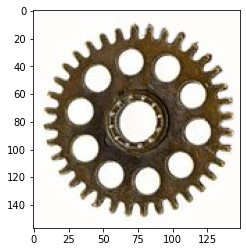

In [2]:
img = cv2.imread('trybik.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

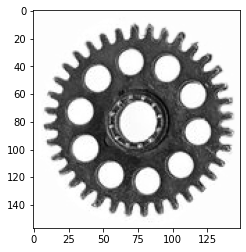

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

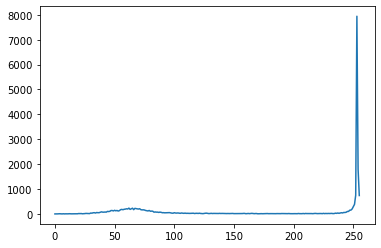

In [4]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist)

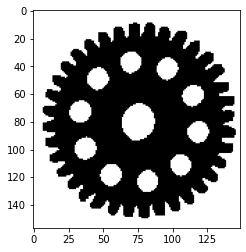

In [5]:
img_thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)[1]
img_thresh = cv2.erode(img_thresh, None, iterations=1)
plt.imshow(img_thresh, cmap='gray')

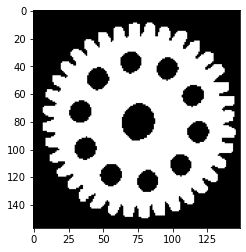

In [6]:
img_thresh_not = cv2.bitwise_not(img_thresh)
plt.imshow(img_thresh_not, cmap='gray')

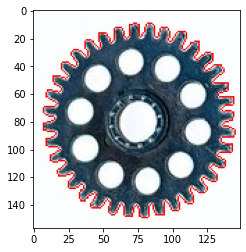

In [7]:
contours, hierarchy = cv2.findContours(img_thresh_not, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_with_contours = img.copy()
cv2.drawContours(img_with_contours, contours, 0, (255, 0, 0), 1)
plt.imshow(img_with_contours)

In [8]:
sobelx = cv2.Sobel(img_thresh_not, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img_thresh_not, cv2.CV_64F, 0, 1, ksize=5)

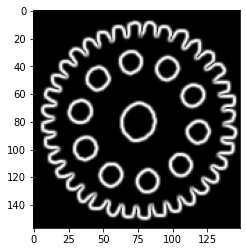

In [9]:
amplitude = np.sqrt(sobelx**2 + sobely**2)
amplitude /= np.amax(amplitude)
plt.imshow(amplitude, cmap='gray')

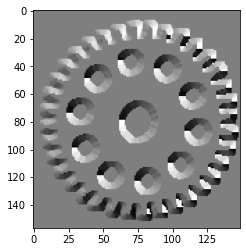

In [10]:
gradient_orientation = (np.arctan2(sobely, sobelx))
plt.imshow(gradient_orientation, cmap='gray')

In [11]:
gradient_orientation_deg_ = (np.rad2deg(gradient_orientation) + 360) % 360

In [12]:
gradient_orientation_deg = np.array([[int(x) for x in row] for row in gradient_orientation_deg_])
gradient_orientation_deg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

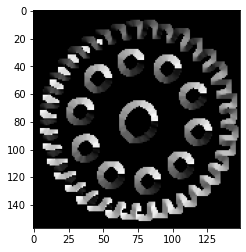

In [13]:
plt.imshow(gradient_orientation_deg_, cmap='gray')

In [14]:
moments = cv2.moments(contours[0], 1)
m00 = moments['m00']
m10 = moments['m10']
m01 = moments['m01']
print(m00, m10, m01)

13840.0 1055923.5 1098188.3333333333


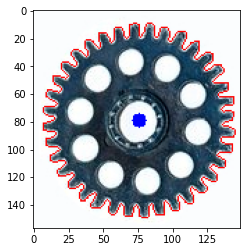

In [16]:
center_of_gravity = (int(m10/m00), int(m01/m00))
img_with_center = img_with_contours.copy()
cv2.circle(img_with_center, center_of_gravity, 5, (0, 0, 255), -1)
plt.imshow(img_with_center)

In [17]:
Rtable = [[] for _ in range(360)]
angles = []
for point in contours[0]:
    x, y = point[0]
    vector = np.array([x,y])- np.array(center_of_gravity)
    angle = np.arctan2(vector[1], vector[0])
    length = np.linalg.norm(vector)
    Rtable[gradient_orientation_deg[y, x]].append((length, angle))
print(Rtable)


[[(67.36467917239716, -1.674896264904496), (66.37017402418047, -1.6764619088947523), (65.37583651472461, -1.6780751824432993), (64.38167441127949, -1.6797382837847623), (63.387695966961914, -1.6814535479687922), (66.48308055437865, -1.8449637779145553), (65.52098900352466, -1.849095985800008), (64.5600495662759, -1.8533512792644842), (63.60031446463138, -1.8577350797256662), (62.6418390534633, -1.8622531212727638), (67.54257916307313, -2.0145789995445376), (66.64082832618455, -2.0210219230556117), (65.7419196555744, -2.027641319640894), (67.42403132415029, -2.1875975505829155), (66.61080993352356, -2.1962813670341257), (68.59300255857006, -2.366503403338588), (68.24221567329127, -2.5332676449712204), (60.207972893961475, -2.58123277668495), (68.87670143089025, -2.6909313275091598), (60.207972893961475, -2.9409397762699068), (69.1158447825099, 3.083686448341686), (69.18092222571191, 3.0692553230511983), (68.65857557508748, 2.921343930199104), (68.8839603971781, 2.9071769778659826), (69.

/opt/homebrew/anaconda3/envs/ml/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/envs/ml/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


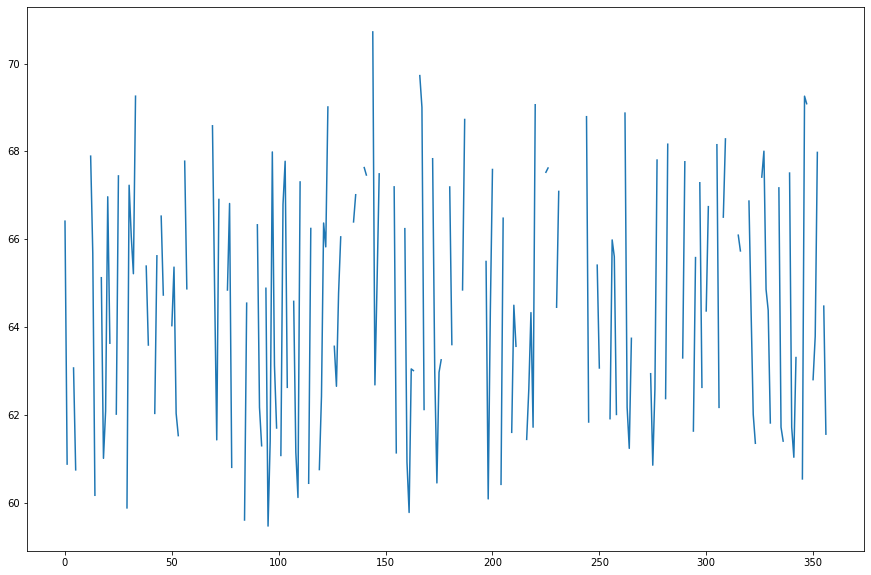

In [18]:
hist = [np.mean([r[0] for r in Rtable[i]]) for i in range(360)]
plt.figure(figsize=(15, 10))
plt.plot(hist)
plt.show()

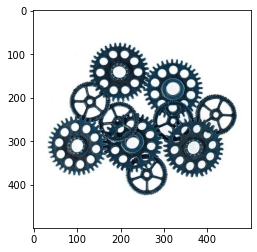

In [19]:
img2 = cv2.imread('trybiki2.jpg')
plt.imshow(img2)

In [20]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2gray = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY)[1]
img2gray = cv2.bitwise_not(img2gray)

sobel2_x = cv2.Sobel(img2gray, cv2.CV_64F, 1, 0, ksize=5)
sobel2_y = cv2.Sobel(img2gray, cv2.CV_64F, 0, 1, ksize=5)

amplitude2 = np.sqrt(sobel2_x**2 + sobel2_y**2)
amplitude2 /= np.amax(amplitude2)

gradient_orientation2 = np.arctan2(sobel2_y, sobel2_x)
gradient_orientation2 = (np.rad2deg(gradient_orientation2) +360) % 360
gradient_orientation2 = np.array([[int(x) for x in row] for row in gradient_orientation2])

hough_space = np.zeros_like(img2gray, dtype='float')
gradient_orientation2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

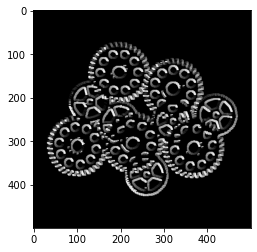

In [21]:
plt.imshow(gradient_orientation2, cmap='gray')
plt.show()

In [22]:
for y in range(hough_space.shape[0]):
    for x in range(hough_space.shape[1]):
        if amplitude2[y, x] > 0.5:
            for r, fi in Rtable[gradient_orientation2[y, x]]:
                x1 = int(-r*np.cos(fi) + x)
                y1 = int(-r*np.sin(fi) + y)
                if 0 <= x1 < hough_space.shape[1] and 0 <= y1 < hough_space.shape[0]:
                    hough_space[y1, x1] += 1
                # else:
                #     print(x1, y1)

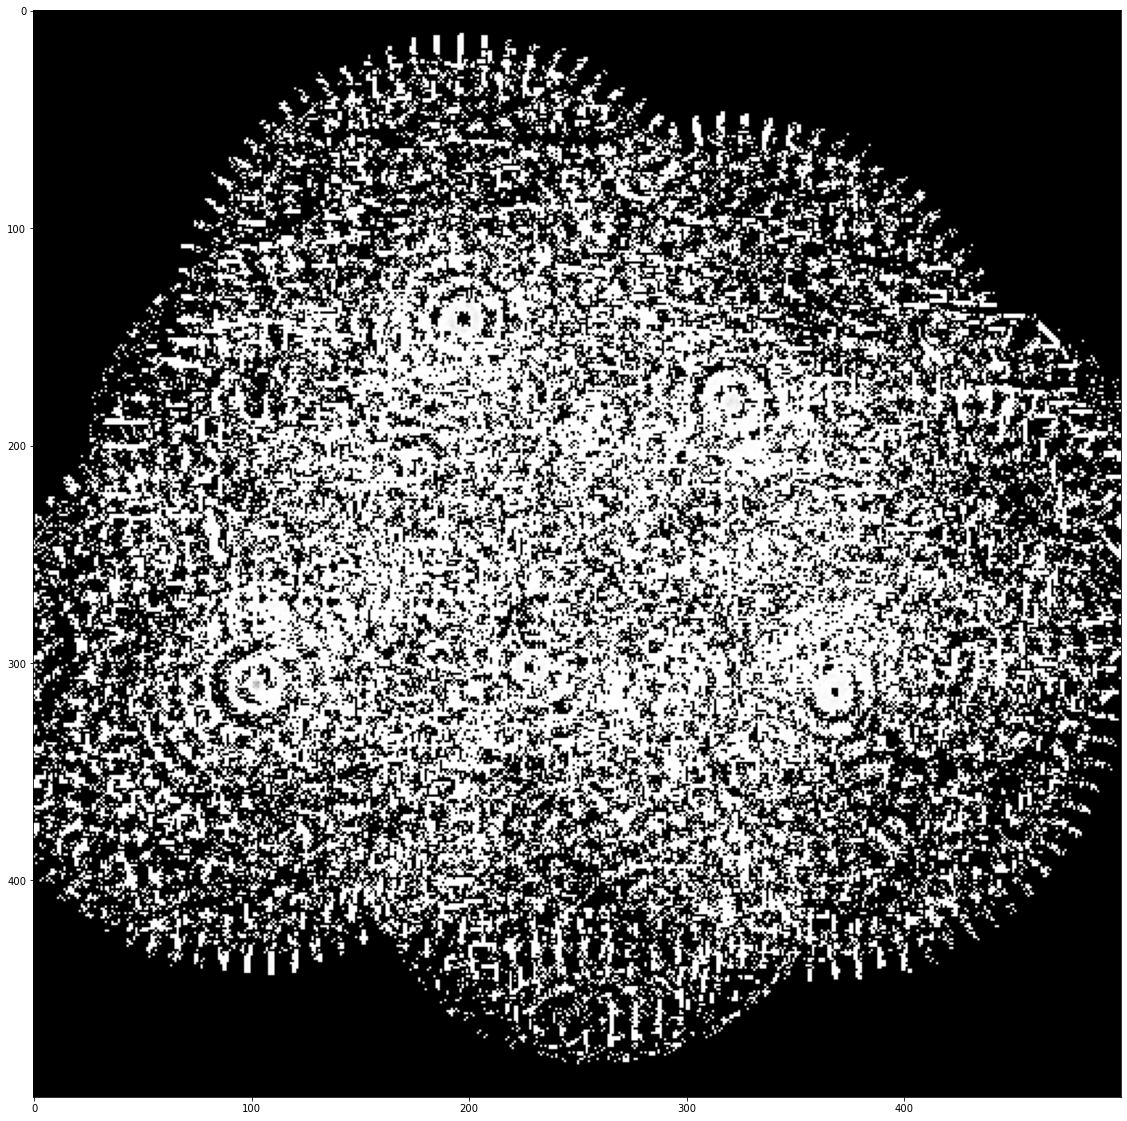

In [199]:
plt.figure(figsize=(20,20))
plt.imshow(hough_space.astype('uint8')*255, cmap='gray')

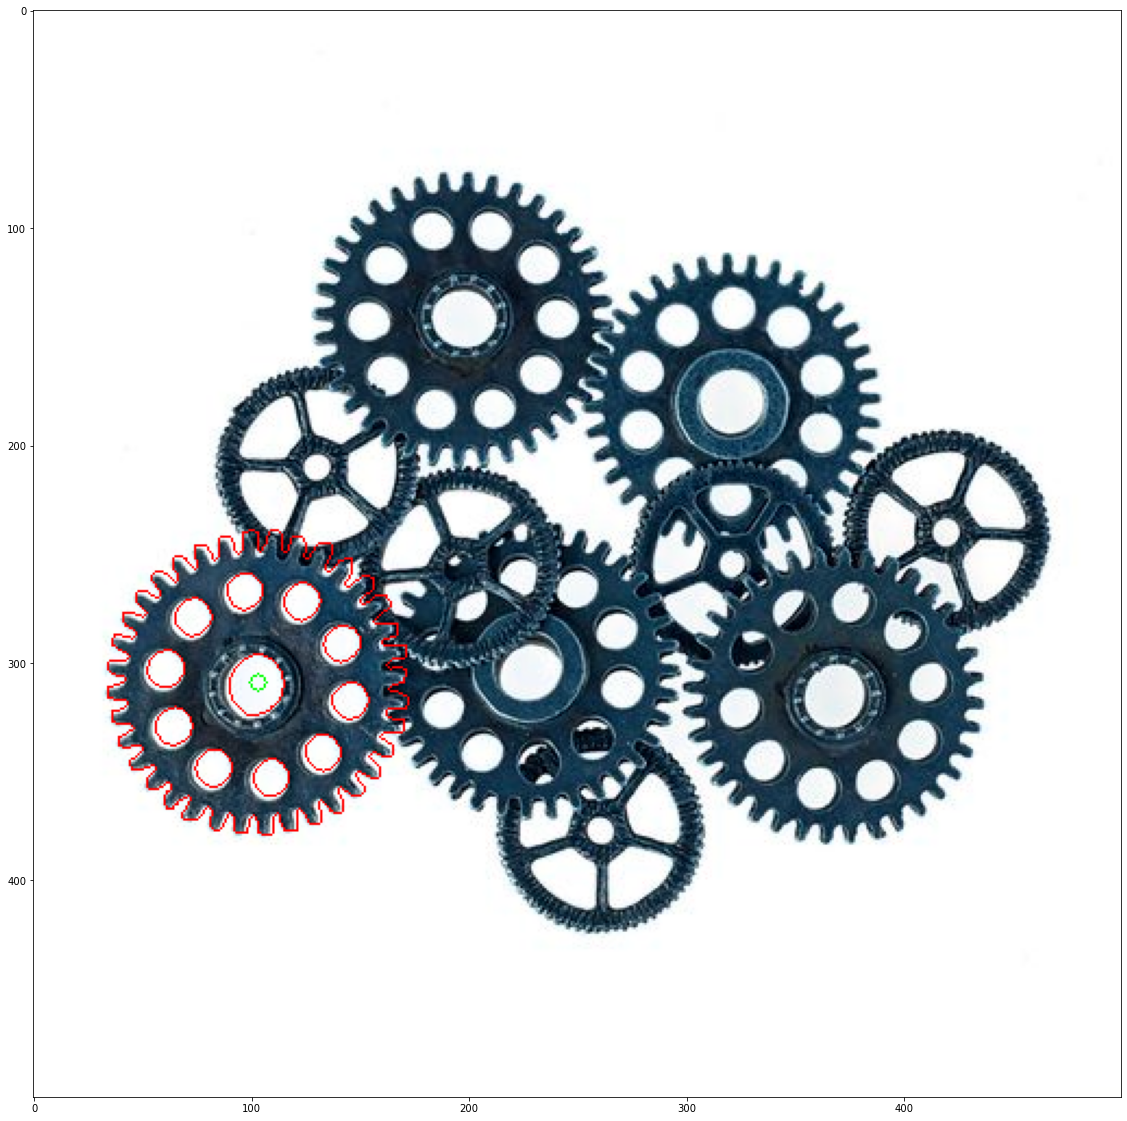

In [ ]:
import copy

hough_max = np.where(hough_space.max() == hough_space)

if len(hough_max[0]) == 1:
    hough_max = [(hough_max[0][0], hough_max[1][0])]

img_houhg = img2.copy()
contours1 = copy.deepcopy(contours)

for m in hough_max:
    for contour in contours1:
        contour += np.array([m[1], m[0]]) - np.array(center_of_gravity) # Shift the contour to the point m
        cv2.drawContours(img_houhg, [contour], 0, (255, 0, 0), 1)
        contour -= np.array([m[1], m[0]]) - np.array(center_of_gravity) # Shift the contour back

    cv2.circle(img_houhg, (m[1], m[0]), 4, (0, 255, 0))
    
plt.figure(figsize=(20,20))
plt.imshow(img_houhg)

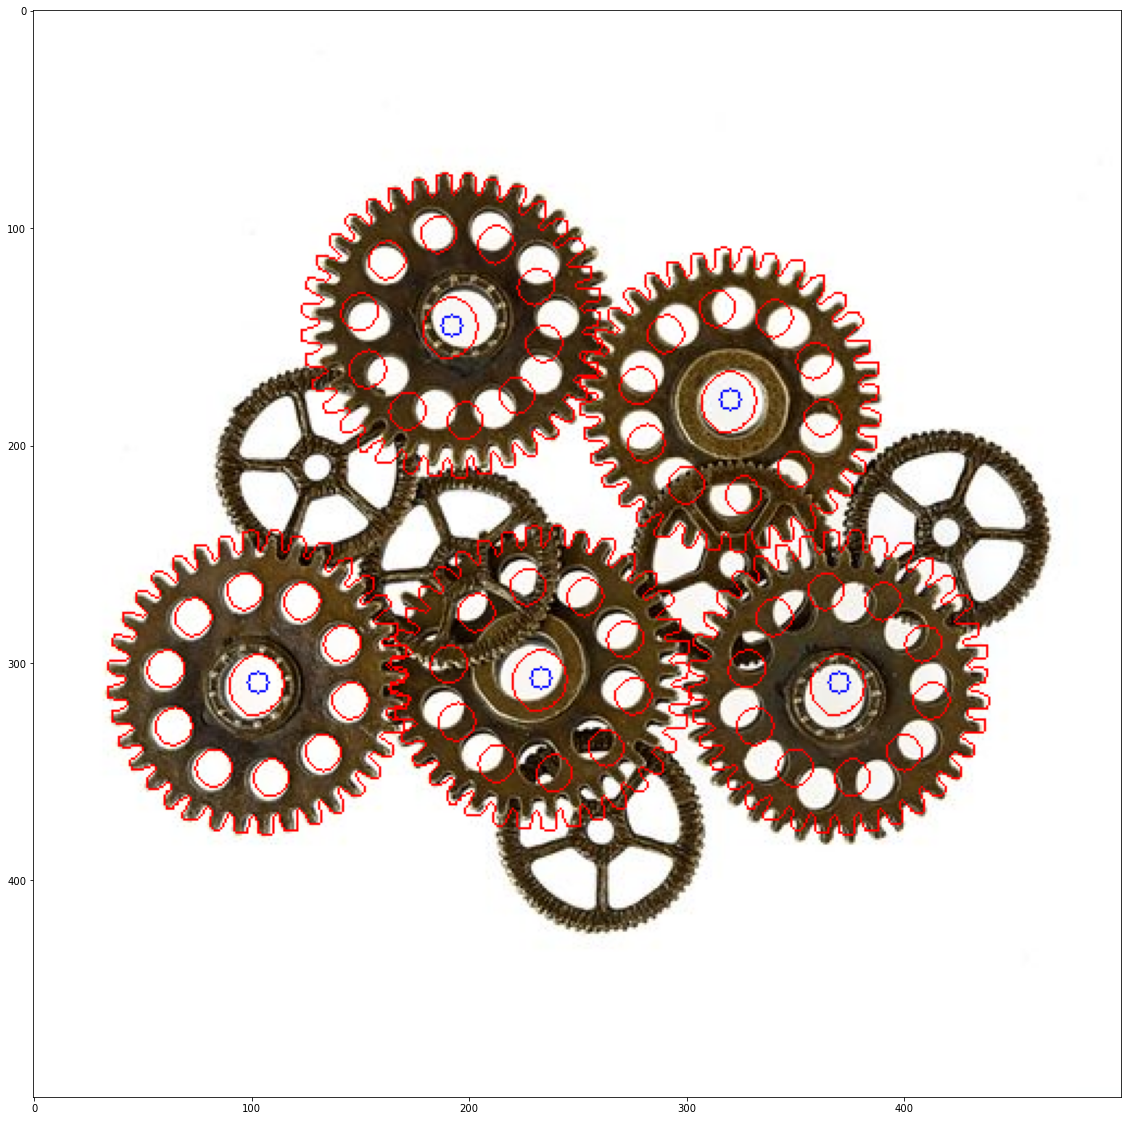

In [ ]:
maxima = []
hough_space_copy = hough_space.copy()

for _ in range(5):
    max_idx = np.unravel_index(np.argmax(hough_space_copy), hough_space_copy.shape)
    maxima.append(max_idx)
    delta = 30
    hough_space_copy[max_idx[0]-delta:max_idx[0]+delta, max_idx[1]-delta:max_idx[1]+delta] = 0

target_image = img2.copy()

contours1 = copy.deepcopy(contours)

for m in maxima:
    for contour in contours1:
        contour += np.array([m[1], m[0]]) - np.array(center_of_gravity) # Shift the contour to the point m
        cv2.drawContours(target_image, [contour], 0, (0, 0, 255), 1)
        contour -= np.array([m[1], m[0]]) - np.array(center_of_gravity) # Shift the contour back
        
    cv2.circle(target_image, (m[1], m[0]), 5, (255, 0, 0))


plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB))